# kütüphaneler

In [15]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [16]:
import seaborn as sns

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# verinin çağrılırması

In [12]:
house = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding="ISO-8859-1")  # Replace with the actual encoding

In [130]:
df1 = house.copy()

In [132]:
df1.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


## grafikler

Text(0, 0.5, 'Ev Sayısı')

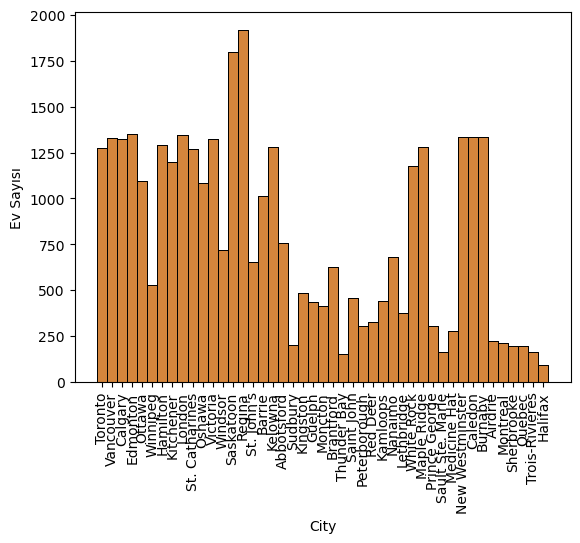

In [403]:
sns.histplot(df1.City,kde=False)
ax = sns.histplot(df1.City, kde=False)
plt.xticks(rotation='vertical');
ax.set_ylabel("Ev Sayısı")

Text(24.0, 0.5, 'Ev Sayısı')

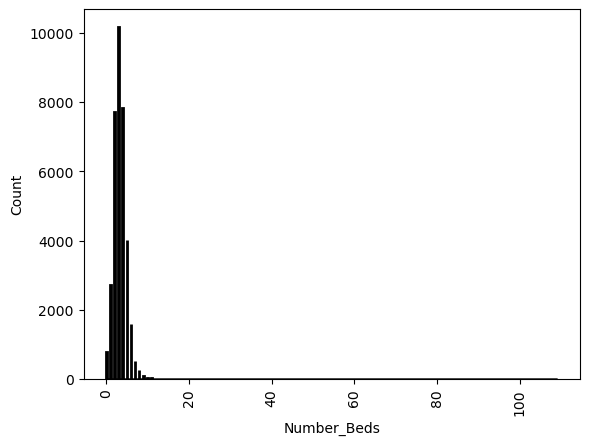

In [404]:
sns.histplot(df1, x="Number_Beds", linewidth=2)
plt.xticks(rotation='vertical')
ax.set_ylabel("Ev Sayısı")

Text(24.0, 0.5, 'Ev Sayısı')

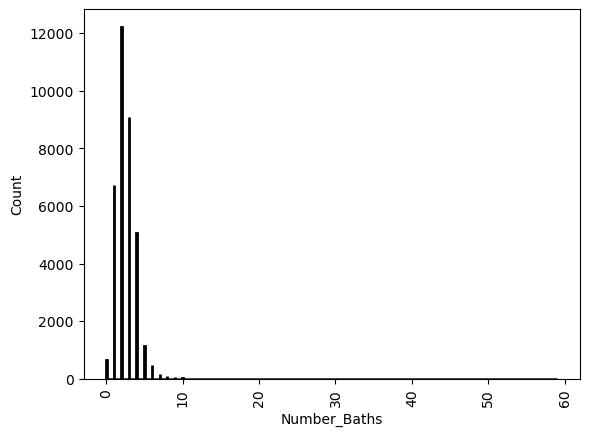

In [405]:
sns.histplot(df1.Number_Baths, linewidth=2)

plt.xticks(rotation='vertical');
ax.set_ylabel("Ev Sayısı")

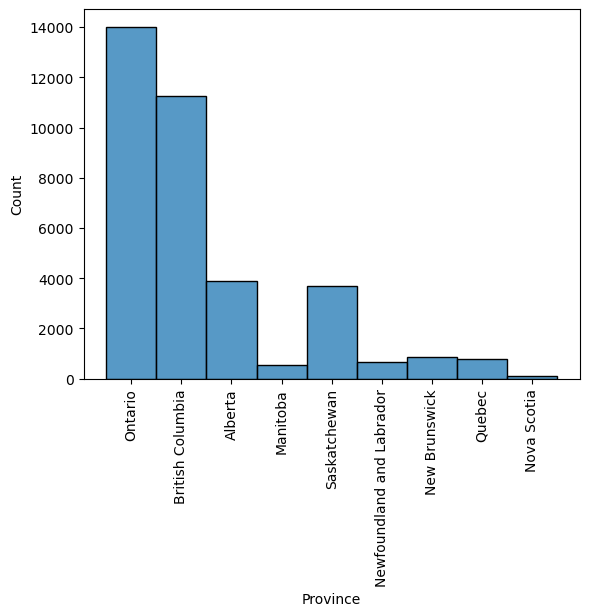

In [72]:
sns.histplot(df1.Province)
plt.xticks(rotation='vertical');
ax.set_ylabel("Ev Sayısı")

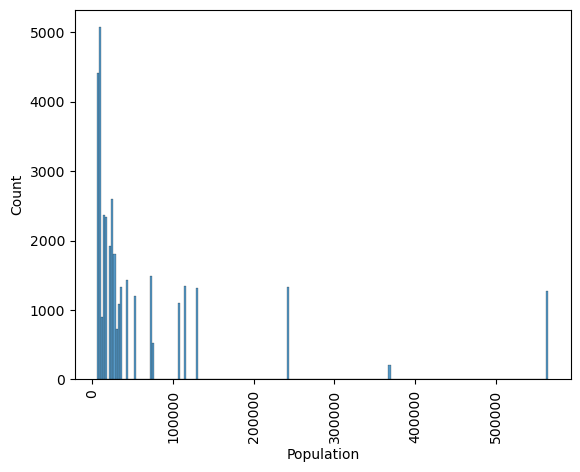

In [74]:
sns.histplot(df1.Population/10)
plt.xticks(rotation='vertical');
ax.set_ylabel("Ev Sayısı")

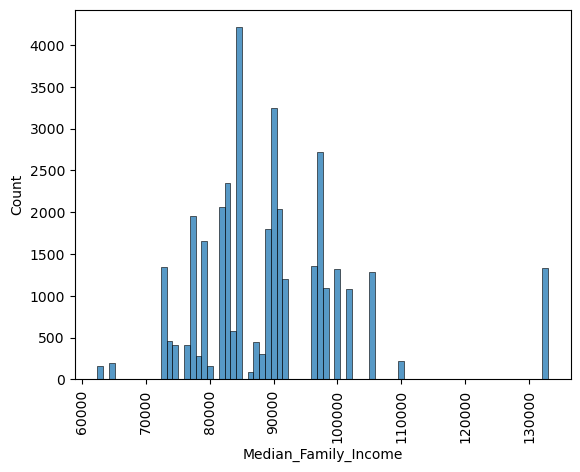

In [75]:
sns.histplot(df1.Median_Family_Income)
plt.xticks(rotation='vertical');
ax.set_ylabel("Ev Sayısı")

In [160]:
df.head()

,Price,Number_Beds,Number_Baths,Population,Median_Family_Income
0,779900.0,3,2,5647656,97000.0
1,799999.0,3,1,5647656,97000.0
2,799900.0,2,2,5647656,97000.0
3,1200000.0,4,2,5647656,97000.0
4,668800.0,1,1,5647656,97000.0


# normalleştirme

gerek olursa eğer

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [162]:
normalized_pop = scaler.fit_transform(df[["Population"]])
normalized_price = scaler.fit_transform(df[["Price"]])
normalized_income = scaler.fit_transform(df[["Median_Family_Income"]])

In [163]:
df["Population"] = normalized_pop
df["Price"] = normalized_price
df["Median_Family_Income"] = normalized_income


In [164]:
df["Population"] 

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
35763    0.065917
35764    0.065917
35765    0.065917
35766    0.065917
35767    0.065917
Name: Population, Length: 35768, dtype: float64

In [165]:
df["Price"]

0        0.020509
1        0.021053
2        0.021050
3        0.031870
4        0.017505
           ...   
35763    0.011315
35764    0.188447
35765    0.010774
35766    0.025106
35767    0.015452
Name: Price, Length: 35768, dtype: float64

## kutu grafiği 

<Axes: xlabel='Price'>

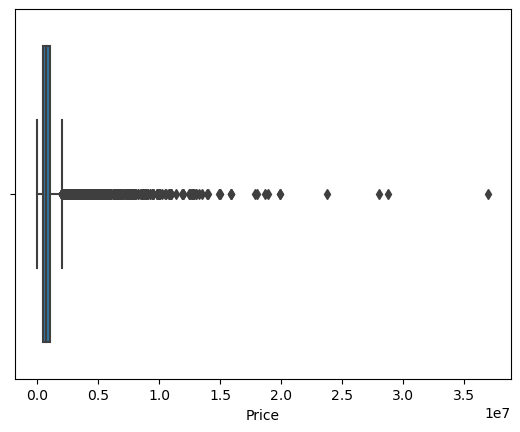

In [395]:
sns.boxplot(x=df1.Price)

<Axes: xlabel='Number_Beds'>

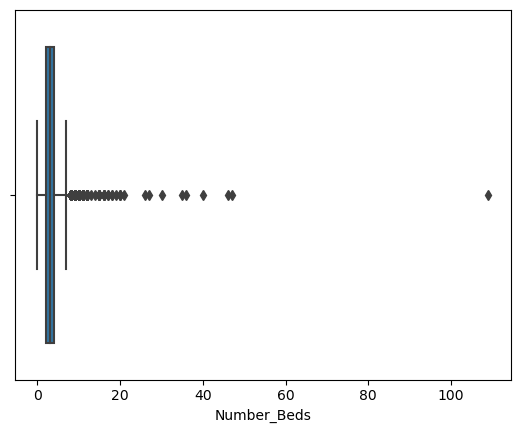

In [406]:
sns.boxplot(x=df1.Number_Beds)

<Axes: xlabel='Population'>

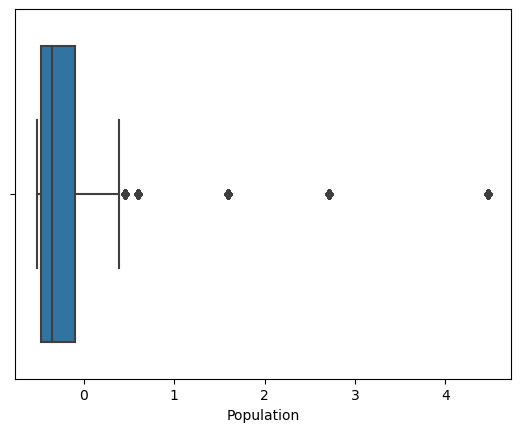

In [137]:
sns.boxplot(x=df1.Population)

<Axes: xlabel='Median_Family_Income'>

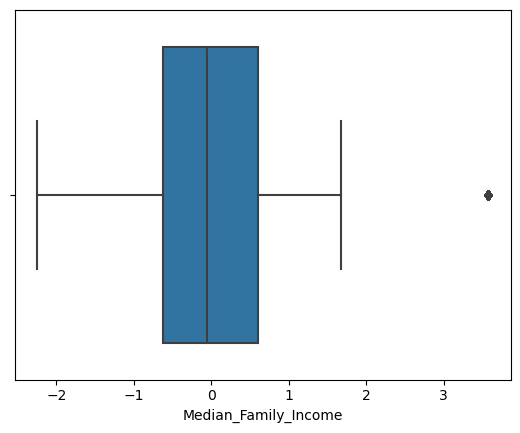

In [138]:
sns.boxplot(x=df1.Median_Family_Income)

In [139]:
def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

outliers_count = detect_outliers(df)
print("Değişkenlerdeki aykırı değer sayısı:")
print(outliers_count)

Değişkenlerdeki aykırı değer sayısı:
{'Price': 2470, 'Number_Beds': 445, 'Number_Baths': 2670, 'Population': 5489, 'Median_Family_Income': 1336}


In [10]:
#aykırı değerleri boxplotta inceledikten sonra çıkarmak istedğklerimin çıkarılması 

In [407]:
deger_sayilari = df1["Number_Beds"].value_counts()
deger_sayilari

3      10174
4       7831
2       7724
5       4004
1       2729
6       1581
0        769
7        511
8        253
9         96
10        35
11        17
12        13
15         6
16         5
20         3
17         2
18         2
21         1
13         1
26         1
27         1
47         1
40         1
35         1
109        1
46         1
14         1
36         1
30         1
19         1
Name: Number_Beds, dtype: int64

In [408]:
hedef = 109

In [409]:
indeks = df1.index[df1['Number_Beds'] == hedef].tolist()
indeks

[9071]

In [410]:
silinecek_indeks = 9071

df = df1.drop(9071) 

# Multiple regression

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [411]:
house = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding="ISO-8859-1")
df1 = house.copy()
province_dummies = pd.get_dummies(df1['Province'], prefix='Prov')
df1 = pd.concat([df1, province_dummies], axis=1)
df1.drop(['Province'], axis=1, inplace=True)
df = df1.drop(['City', 'Address', 'Latitude', 'Longitude'], axis=1)
df = df.drop(9071) # çok büyük bir farkla aykırı değer olduğu için 

In [412]:
X = df.drop("Price" , axis = 1) #tüm bağımsız değşkenler 
y = df["Price"]
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.80, test_size=0.20, shuffle=False, random_state=42)


In [413]:
model = LinearRegression()

In [414]:
model.fit(X_train, y_train)

LinearRegression()

In [415]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 479972485457.1623


In [416]:
r_squared = r2_score(y_test, y_pred)

In [417]:
r_squared

0.42276986415053175

In [418]:
# MAE hesaplama
mae = mean_absolute_error(y_test, y_pred)
mae

353654.82429462776

In [419]:
# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
mse

479972485457.1623

### mse=481611292502.7577
### mae=354936.4428
### r2=0.42079898

# KNN

In [18]:
house = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding="ISO-8859-1")
df1 = house.copy()
province_dummies = pd.get_dummies(df1['Province'], prefix='Prov')
df1 = pd.concat([df1, province_dummies], axis=1)
df1.drop(['Province'], axis=1, inplace=True)
df = df1.drop(['City', 'Address', 'Latitude', 'Longitude'], axis=1)
df = df.drop(9071) # çok büyük bir farkla aykırı değer olduğu için 

In [193]:
df.head()

,Price,Number_Beds,Number_Baths,Population,Median_Family_Income,Prov_Alberta,Prov_British Columbia,Prov_Manitoba,Prov_New Brunswick,Prov_Newfoundland and Labrador,Prov_Nova Scotia,Prov_Ontario,Prov_Quebec,Prov_Saskatchewan
0,779900.0,3,2,5647656,97000.0,0,0,0,0,0,0,1,0,0
1,799999.0,3,1,5647656,97000.0,0,0,0,0,0,0,1,0,0
2,799900.0,2,2,5647656,97000.0,0,0,0,0,0,0,1,0,0
3,1200000.0,4,2,5647656,97000.0,0,0,0,0,0,0,1,0,0
4,668800.0,1,1,5647656,97000.0,0,0,0,0,0,0,1,0,0


In [425]:
df

,Price,Number_Beds,Number_Baths,Population,Median_Family_Income,Prov_Alberta,Prov_British Columbia,Prov_Manitoba,Prov_New Brunswick,Prov_Newfoundland and Labrador,Prov_Nova Scotia,Prov_Ontario,Prov_Quebec,Prov_Saskatchewan
0,-0.160171,3,2,4.474615,0.606392,0,0,0,0,0,0,1,0,0
1,-0.140426,3,1,4.474615,0.606392,0,0,0,0,0,0,1,0,0
2,-0.140523,2,2,4.474615,0.606392,0,0,0,0,0,0,1,0,0
3,0.252523,4,2,4.474615,0.606392,0,0,0,0,0,0,1,0,0
4,-0.269312,1,1,4.474615,0.606392,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35763,-0.494176,2,2,-0.182622,-0.238209,0,0,0,0,0,1,0,0,0
35764,5.940440,5,5,-0.182622,-0.238209,0,0,0,0,0,1,0,0,0
35765,-0.513823,2,2,-0.182622,-0.238209,0,0,0,0,0,1,0,0,0
35766,0.006832,3,1,-0.182622,-0.238209,0,0,0,0,0,1,0,0,0


In [19]:
X = df.drop("Price" , axis = 1) #tüm bağımsız değşkenler 
y = df["Price"]
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.80, shuffle=False, random_state = 42 )


In [20]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [21]:
knn_model

KNeighborsRegressor()

In [22]:
knn_model.n_neighbors

5

In [23]:
y_pred = knn_model.predict(X_test) 

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred)) 

747015.3320896846

In [25]:
r_squared = r2_score(y_test, y_pred)

In [26]:
r_squared

0.3288931284893043

In [27]:
# MAE hesaplama
mae = mean_absolute_error(y_test, y_pred)
mae

368090.58094772155

In [28]:
# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
mse

558031906377.0618

## knn model tuning

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
knn_params = {'n_neighbors': np.arange(1,50,1)}

In [235]:
knn = KNeighborsRegressor()

In [236]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [237]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [238]:
knn_cv_model.best_params_["n_neighbors"]

49

In [239]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [240]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=49)

In [241]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.7281980074136609

In [242]:
r_squared = r2_score(y_test, y_pred)

In [243]:
r_squared

0.2323911492348919

# Random forest

In [29]:
house = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding="ISO-8859-1")
df1 = house.copy()
province_dummies = pd.get_dummies(df1['Province'], prefix='Prov')
df1 = pd.concat([df1, province_dummies], axis=1)
df1.drop(['Province'], axis=1, inplace=True)
df = df1.drop(['City', 'Address', 'Latitude', 'Longitude'], axis=1)
df = df.drop(9071) # çok büyük bir farkla aykırı değer olduğu için 

In [31]:
X = df.drop("Price" , axis = 1) #tüm bağımsız değşkenler 
y = df["Price"]
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.80, test_size=0.20, shuffle=False, random_state = 42 )


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf_model = RandomForestRegressor(random_state = 42)

In [34]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
rf_model.predict(X_test)[0:5]

array([1364521.6868218 , 2285658.54036802,  556944.50240404,
       1039027.51548703,  824048.47106782])

In [36]:
y_pred = rf_model.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

720285.7942463504

In [38]:
r_squared = r2_score(y_test, y_pred)

In [39]:
r_squared

0.37606068247704116

In [40]:
# MAE hesaplama
mae = mean_absolute_error(y_test, y_pred)
mae

319803.7206006309

In [41]:
# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
mse

518811625393.09576

## random forest model tuning

In [255]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000]}

In [256]:
rf_model = RandomForestRegressor(random_state = 42)

In [257]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [258]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000]})

In [259]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 100}

In [260]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 5, 
                                 n_estimators =100) #çıkan parameteelei direkt yazdım 

In [261]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=5)

In [262]:
y_pred = rf_tuned.predict(X_test)

In [263]:
np.sqrt(mean_squared_error(y_test, y_pred))

671222.665057921

In [264]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.4581664658140586

In [265]:
# MAE hesaplama
mae = mean_absolute_error(y_test, y_pred)
mae

307479.63522949413

In [266]:
# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
mse

450539866087.45795

# SVR SUPPORT VEKTOR REG.

In [30]:
house = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding="ISO-8859-1")
df1 = house.copy()
province_dummies = pd.get_dummies(df1['Province'], prefix='Prov')
df1 = pd.concat([df1, province_dummies], axis=1)
df1.drop(['Province'], axis=1, inplace=True)
df = df1.drop(['City', 'Address', 'Latitude', 'Longitude'], axis=1)
df = df.drop(9071) # çok büyük bir farkla aykırı değer olduğu için 

In [31]:
X = df.drop("Price" , axis = 1) #tüm bağımsız değşkenler 
y = df["Price"]
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.80, test_size=0.20, shuffle=False, random_state = 42 )


In [32]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
r_squared = r2_score(y_test, y_pred)

# Neural Network Regression

In [334]:
house = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding="ISO-8859-1")
df1 = house.copy()
province_dummies = pd.get_dummies(df1['Province'], prefix='Prov')
df1 = pd.concat([df1, province_dummies], axis=1)
df1.drop(['Province'], axis=1, inplace=True)
df = df1.drop(['City', 'Address', 'Latitude', 'Longitude'], axis=1)
df = df.drop(9071) # çok büyük bir farkla aykırı değer olduğu için 

In [335]:
X = df.drop("Price" , axis = 1) #tüm bağımsız değşkenler 
y = df["Price"]
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.80, test_size=0.20, shuffle=False, random_state = 42 )


In [336]:
from sklearn.preprocessing import StandardScaler

In [337]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [338]:
X_train_scaled = scaler.transform(X_train)

In [339]:
X_test_scaled = scaler.transform(X_test)

In [340]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

C:\Users\orteg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [341]:
from sklearn.neural_network import MLPRegressor

In [342]:
y_pred = mlp_model.predict(X_test_scaled)

In [343]:
np.sqrt(mean_squared_error(y_test, y_pred))

672458.4616693092

In [344]:
r_squared = r2_score(y_test, y_pred)

In [345]:
r_squared

0.4561694758991357

In [346]:
# MAE hesaplama
mae = mean_absolute_error(y_test, y_pred)
mae

353989.73868124344

In [347]:
# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
mse

452200382670.6538

### mse=452200382670.6538
### mae=353989.7386
### r2 =0.45

# Gradient Regression


In [348]:
house = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding="ISO-8859-1")
df1 = house.copy()
province_dummies = pd.get_dummies(df1['Province'], prefix='Prov')
df1 = pd.concat([df1, province_dummies], axis=1)
df1.drop(['Province'], axis=1, inplace=True)
df = df1.drop(['City', 'Address', 'Latitude', 'Longitude'], axis=1)
df = df.drop(9071) # çok büyük bir farkla aykırı değer olduğu için 

In [349]:
X = df.drop("Price" , axis = 1) #tüm bağımsız değşkenler 
y = df["Price"]
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.80, test_size=0.20, shuffle=False, random_state=42)


In [362]:
from sklearn.ensemble import GradientBoostingRegressor

In [363]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [364]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

747066.9850695389

In [365]:
r_squared = r2_score(y_test, y_pred)

In [366]:
r_squared

0.32880031682484845

In [367]:
# MAE hesaplama
mae = mean_absolute_error(y_test, y_pred)
mae

324712.008856874

In [368]:
# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
mse

558109080180.8907

### mse=491190304295.7
### mae=320296.9
### r2=0.32

# modellerin kıyaslanması 

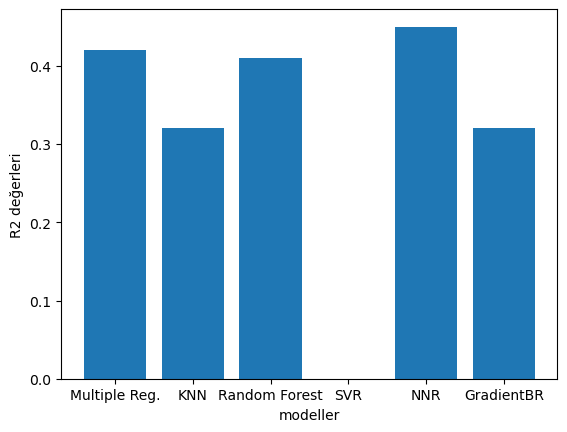

In [55]:
degerler = [0.42, 0.32, 0.41, 0, 0.45, 0.32]
modeller = ['Multiple Reg.', 'KNN', 'Random Forest', 'SVR', 'NNR', 'GradientBR']

plt.bar(modeller, degerler)
plt.xlabel('modeller')
plt.ylabel('R2 değerleri')

plt.show()

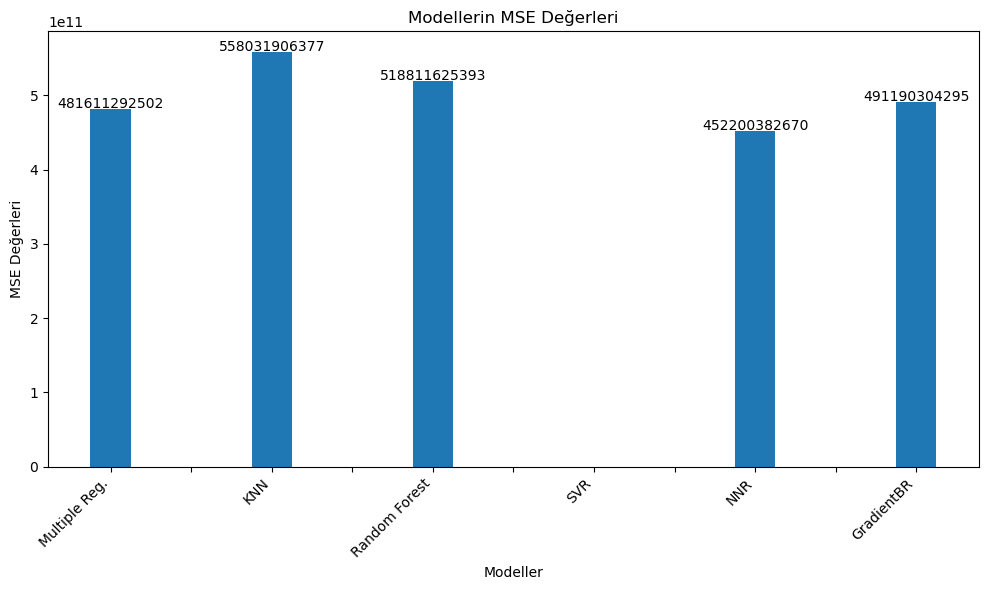

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Veri
models = ['Multiple Reg.', '', 'KNN', '', 'Random Forest', '', 'SVR', '', 'NNR', '', 'GradientBR']
mse_values = [481611292502, 0, 558031906377, 0, 518811625393, 0, 0, 0, 452200382670, 0, 491190304295]

x = np.arange(len(models)) 
width = 0.5  

plt.figure(figsize=(10, 6))

bars = plt.bar(x, mse_values, width)

plt.xticks(x, models, rotation=45, ha="right")

plt.xlabel('Modeller')
plt.ylabel('MSE Değerleri')
plt.title('Modellerin MSE Değerleri')

# Her bir çubuk için metinler
for i, val in enumerate(mse_values):
    if val != 0:  
        plt.text(bars[i].get_x() + bars[i].get_width() / 2, val + 1000000000, str(val), ha='center')

plt.tight_layout()
plt.show()

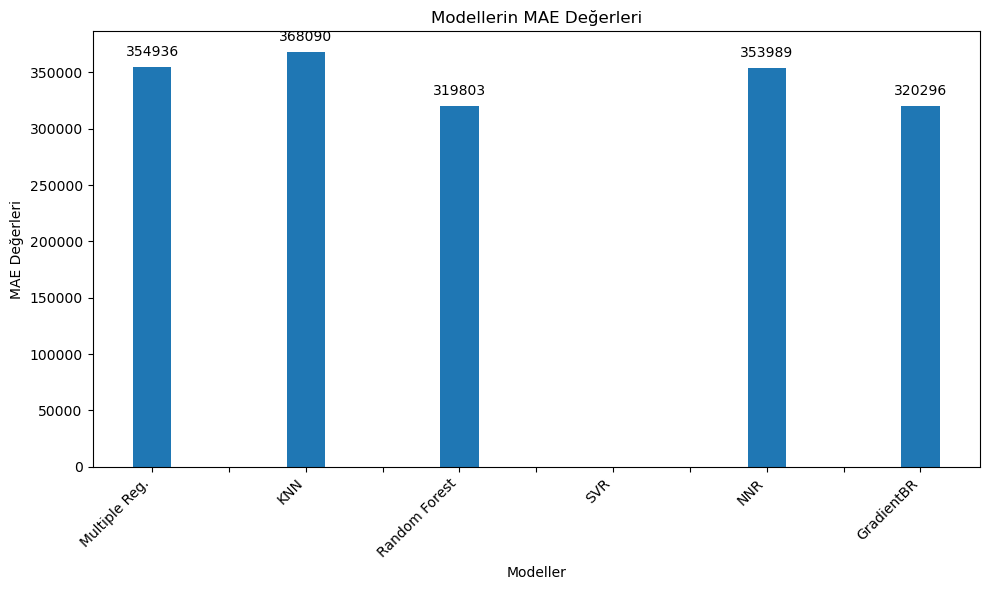

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Veri
models = ['Multiple Reg.', '', 'KNN', '', 'Random Forest', '', 'SVR', '', 'NNR', '', 'GradientBR']
mae_values = [354936, 0, 368090, 0, 319803, 0, 0, 0, 353989, 0, 320296]

x = np.arange(len(models))  
width = 0.5  

plt.figure(figsize=(10, 6))

bars = plt.bar(x, mae_values, width)

plt.xticks(x, models, rotation=45, ha="right")

plt.xlabel('Modeller')
plt.ylabel('MAE Değerleri')
plt.title('Modellerin MAE Değerleri')

for i, val in enumerate(mae_values):
    if val != 0:  
        plt.text(bars[i].get_x() + bars[i].get_width() / 2, val + 10000, str(val), ha='center')

plt.tight_layout()
plt.show()
